In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
df_bank = pd.read_csv("/Users/lolonastri/Desktop/IA_UCEMA/parciales/primer_parcial/data/bank-full.csv", delimiter = ";")
df_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## 🎯 Objetivo del modelo

## ❓ ¿Qué métrica deberíamos priorizar?

---

## **Parte 1: Comprensión y Preparación de Datos**

### → Validación de la data

In [3]:
print("El dataset tiene" , df_bank.shape[0], "filas y", df_bank.shape[1], "columnas")

El dataset tiene 45211 filas y 17 columnas


In [4]:
df_bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
from funciones.funciones import validate_columns
validate_columns(df_bank)

,Unique_Values,Num_Unique_Values,Num_Null_Values,%_Null_Values,Sample_Unique_Values
age,NaN,45211.0,0,0.0,"[50, 42, 27, 25, 55]"
job,12,45211,0,0.0,"[technician, technician, services, blue-collar..."
marital,3,45211,0,0.0,"[married, married, married, single, single]"
education,4,45211,0,0.0,"[secondary, secondary, secondary, secondary, t..."
default,2,45211,0,0.0,"[no, no, no, no, no]"
balance,NaN,45211.0,0,0.0,"[-584, 4466, 0, 674, 430]"
housing,2,45211,0,0.0,"[no, no, yes, no, no]"
loan,2,45211,0,0.0,"[no, no, no, no, no]"
contact,3,45211,0,0.0,"[cellular, cellular, unknown, cellular, cellular]"
day,NaN,45211.0,0,0.0,"[20, 17, 15, 24, 29]"


In [6]:
df_bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


---

### →  Veo los tipos de datos con dtypes

In [7]:
df_bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [8]:
df_bank['y'].value_counts().sort_index() #desbalanceo de clases

y
no     39922
yes     5289
Name: count, dtype: int64

In [9]:
for col in df_bank.columns:
    print(f"Value counts for {col}:")
    print(df_bank[col].value_counts())
    print("\n")

Value counts for age:
age
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: count, Length: 77, dtype: int64


Value counts for job:
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64


Value counts for marital:
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64


Value counts for education:
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64


Value counts for default:
default
no     44396
yes      815
Name: count, dtype: int64


Value counts for balance:
balance
 0        3514
 1         195
 2         156
 4         139
 3         134
          ... 
-381         1
 4617     

---

### → La variable `duration` está en segundos, la convierto a minutos.

In [10]:
df_bank["duration"] = df_bank["duration"]/60

---

### → Valores outliers

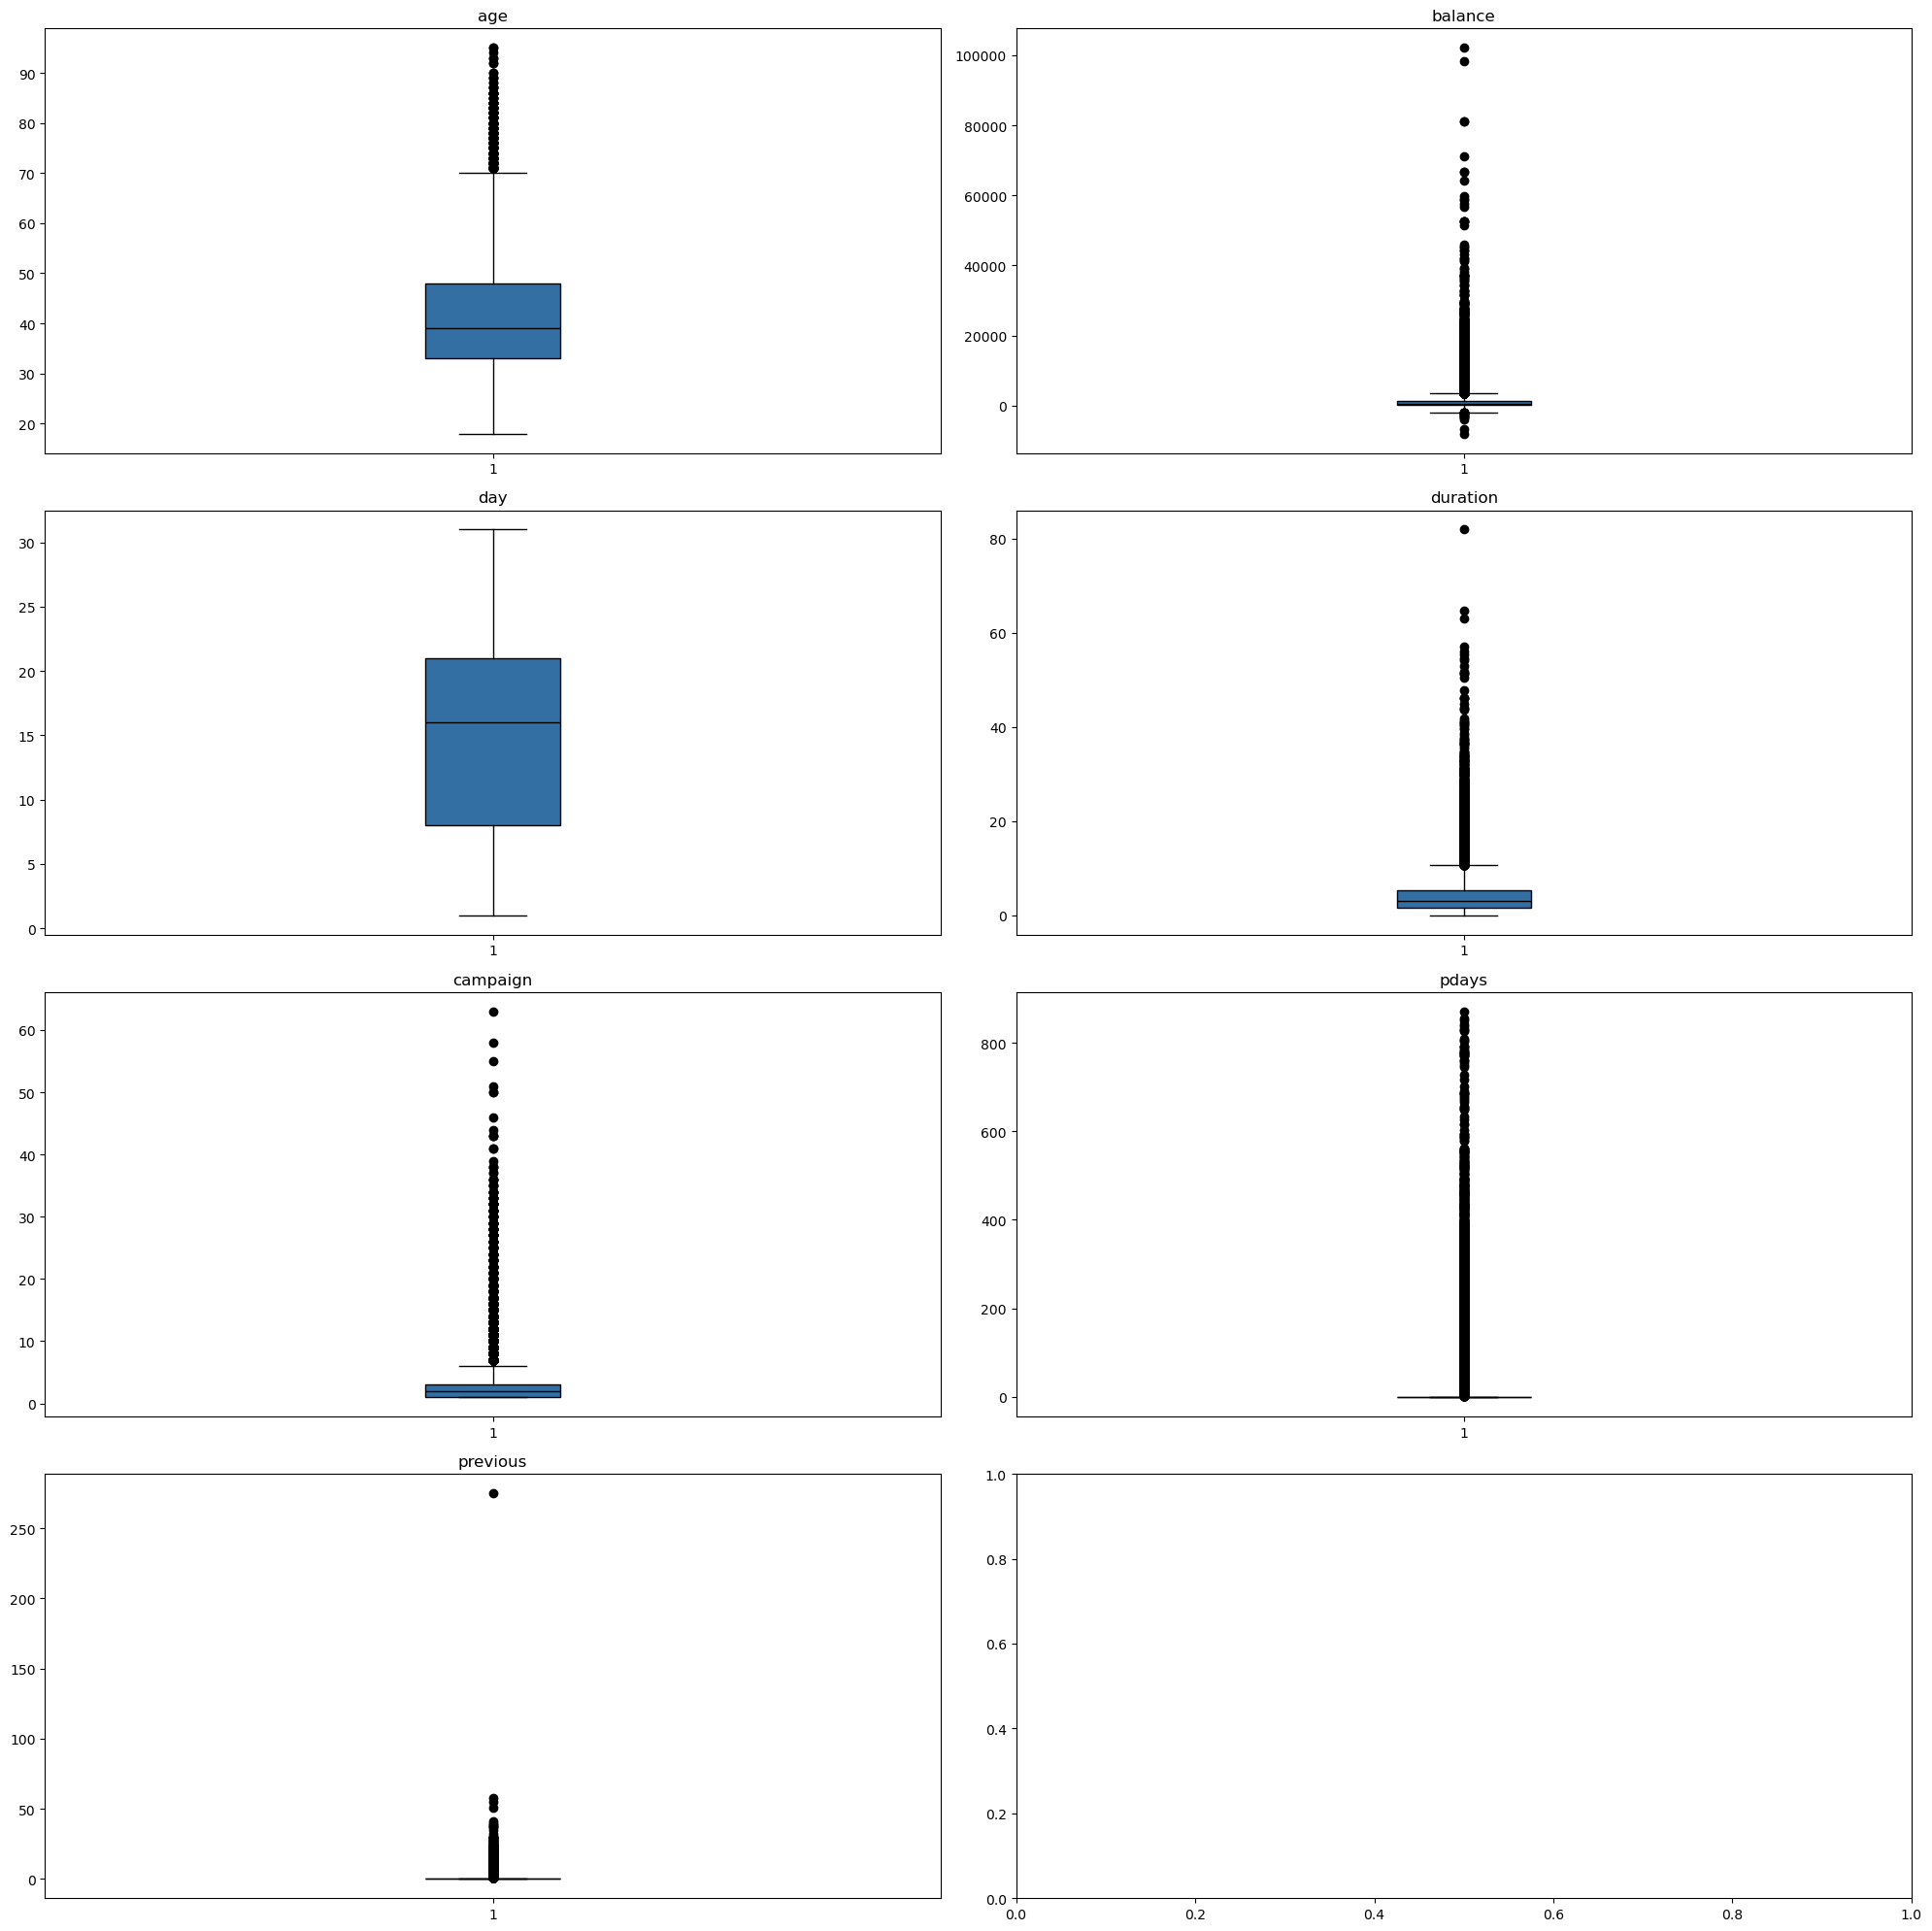

In [11]:
from funciones.funciones import plot_outliers
plot_outliers(df_bank)

#### Para la variable campaign, he tomado la decisión de recortar los valores extremos a un máximo razonable (por ejemplo, 10 o 15), ya que realizar más de 30 contactos con un mismo cliente es poco común y podría sesgar el análisis. Si bien estos valores pueden ser reales, su ocurrencia es tan baja que pueden actuar como ruido en el modelo.

In [12]:
from funciones.funciones import reconocimiento_de_outliers
outliers_campagin, outlier_values_campaign = reconocimiento_de_outliers(df_bank, "campaign", 5)

Outliers de campaign:
2706     19
2967     14
3044     14
3079     24
3118     16
         ..
37792    15
38580    15
38767    14
40336    15
44594    16
Name: campaign, Length: 707, dtype: int64


In [13]:
def remove_outliers(df, column, outliers):
    if column in df.columns:
        df = df.drop(df[df[column].isin(outliers)].index)
    return df

In [14]:
df_bank = remove_outliers(df_bank, "campaign", outlier_values_campaign)

---

## **Parte 2: Análisis Exploratorio de Datos**


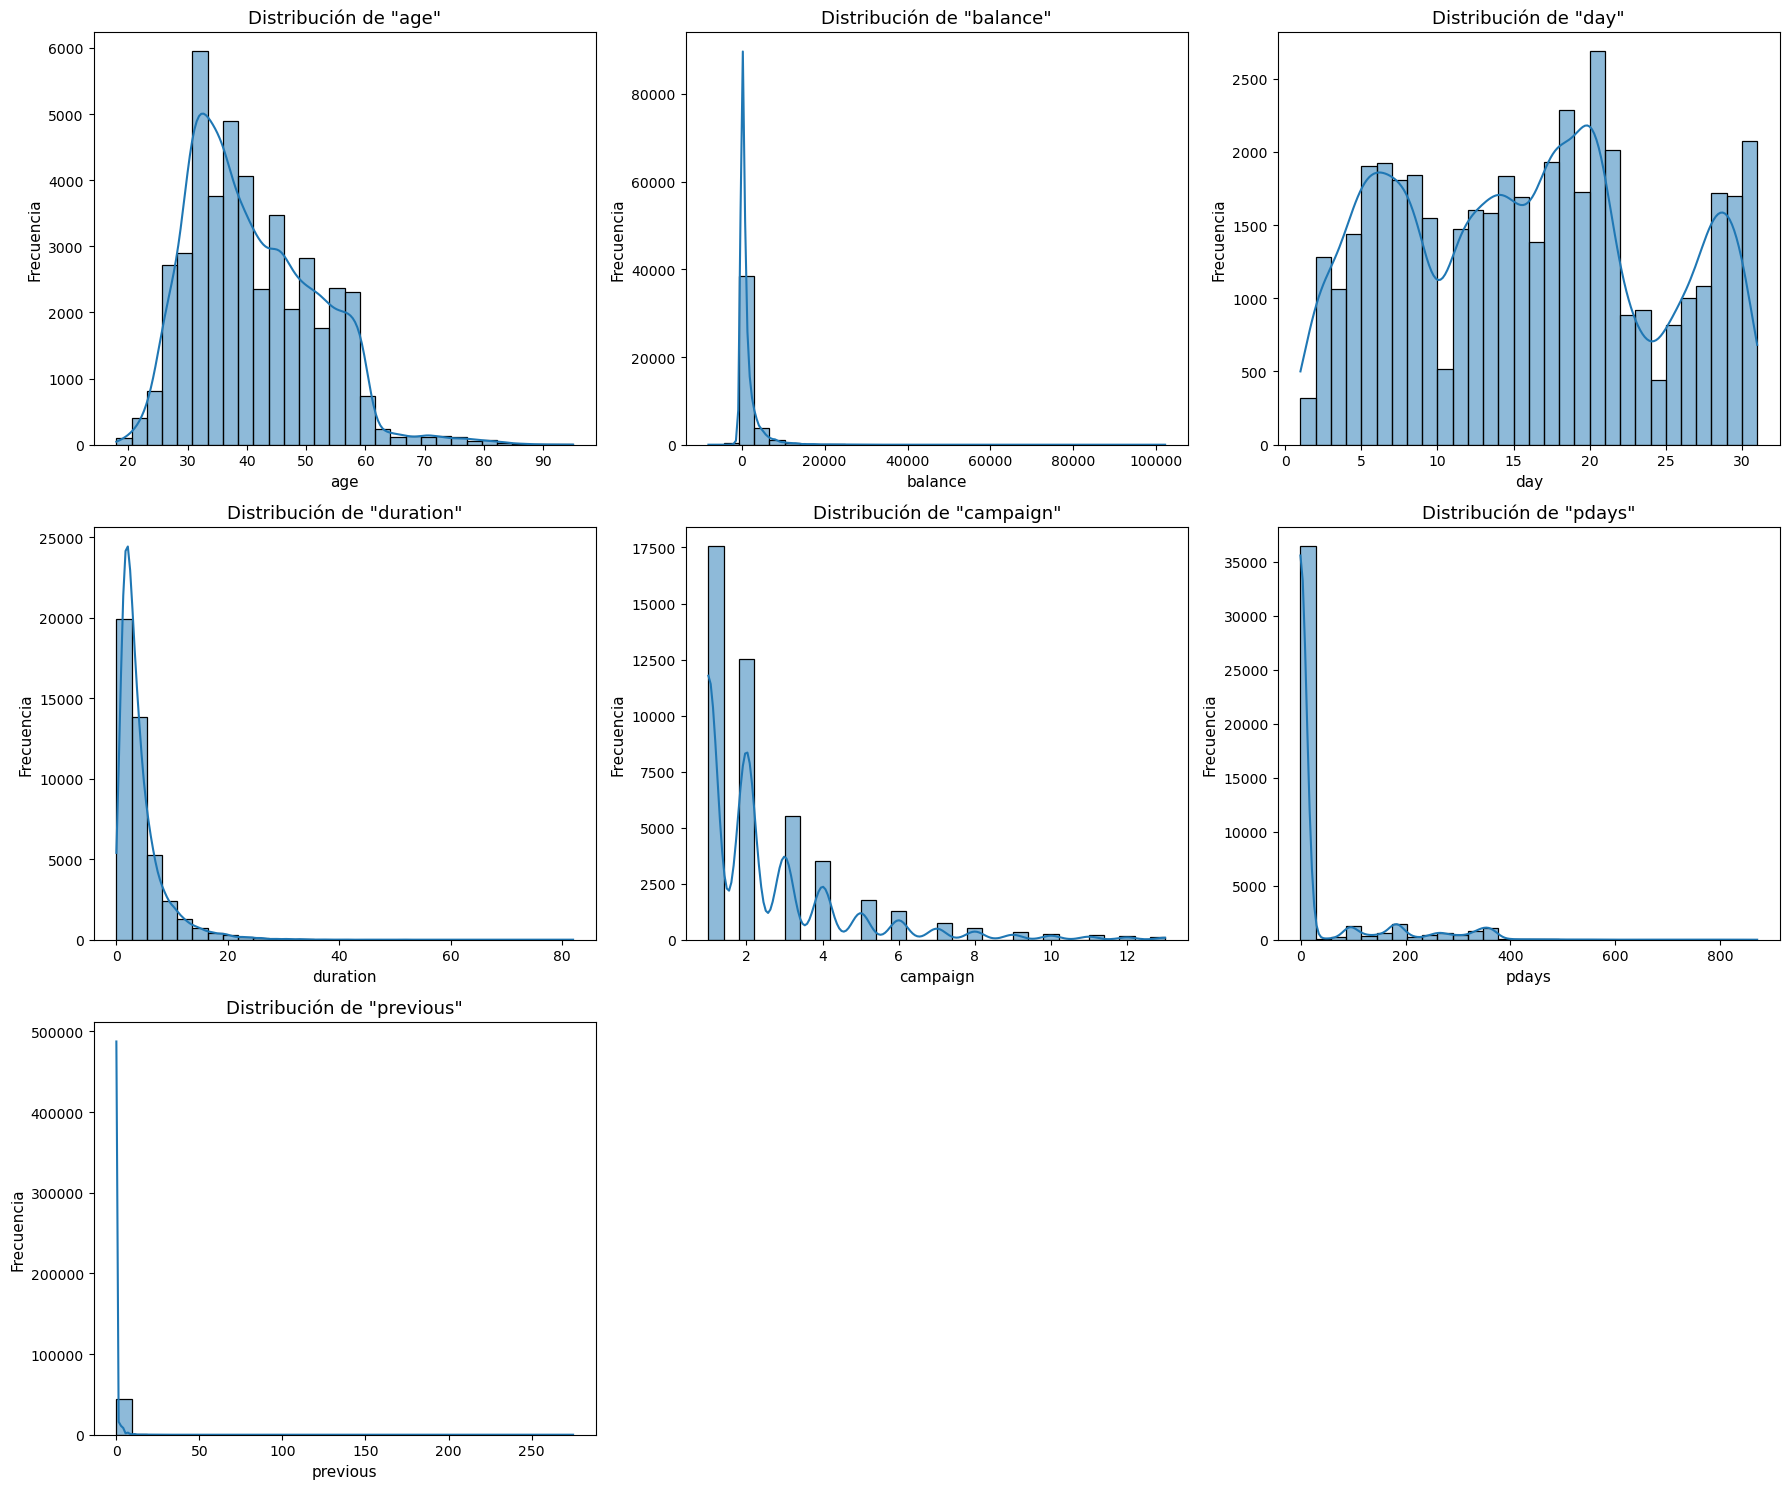

In [15]:
import math
numerical_vars = df_bank.select_dtypes(include=['int64', 'float64']).columns

# Cantidad de gráficos y configuración de grilla
num_vars = len(numerical_vars)
cols = 3
rows = math.ceil(num_vars / cols)

# Crear figura y ejes
fig, axes = plt.subplots(rows, cols, figsize=(18, 5 * rows))
axes = axes.flatten()  # Aplanar la grilla para recorrer fácilmente

# Generar cada histograma
for i, col in enumerate(numerical_vars):
    sns.histplot(df_bank[col], kde=True, bins=30, edgecolor='black', ax=axes[i])
    axes[i].set_title(f'Distribución de "{col}"', fontsize=13)
    axes[i].set_xlabel(col, fontsize=11)
    axes[i].set_ylabel("Frecuencia", fontsize=11)

# Eliminar ejes vacíos si sobran
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## 📊 Conclusiones sobre la distribución de variables numéricas

### 👤 `age` (Edad del cliente)
- Distribución **asimétrica negativa** (ligeramente sesgada a la izquierda).
- La mayoría de los clientes tienen entre **30 y 40 años**, con pocos valores por encima de los 70.
- No se observan outliers preocupantes.

### 💶 `balance` (Saldo promedio anual)
- Distribución **fuertemente sesgada a la derecha**, con varios valores extremos.
- La mayoría de los saldos se concentran entre **0 y 5.000 euros**, aunque hay clientes con más de **60.000 euros**.
- Existen outliers que podrían ser considerados para transformación o winsorización.

### 📅 `day` (Día del mes del último contacto)
- Distribución **relativamente uniforme**, sin una tendencia clara.
- Puede estar más relacionada a la operativa del banco que al comportamiento del cliente.

### ⏱️ `duration` (Duración del último contacto en minutos)
- Distribución **altamente sesgada a la derecha**.
- La mayoría de las llamadas duran menos de **10 minutos**, con algunos contactos muy extensos.
- Variable muy predictiva, pero debe usarse con cuidado para evitar **data leakage** (fuga de información).

### 📞 `campaign` (Cantidad de contactos en la campaña actual)
- Distribución **muy sesgada a la derecha**.
- La mayoría de los clientes fueron contactados entre **1 y 3 veces**.
- Existen valores extremos superiores a 30 contactos, que pueden actuar como ruido.

### 📆 `pdays` (Días desde el último contacto en campaña anterior)
- Alta concentración en el valor **-1** (no contactado antes).
- Entre los que sí fueron contactados, la distribución es nuevamente **sesgada a la derecha**, con pocos contactos recientes.

### 📞 `previous` (Número de contactos previos antes de esta campaña)
- Distribución **extremadamente sesgada**, con más del 85% de los clientes con **0 contactos previos**.
- Algunos clientes fueron contactados muchas veces, lo cual puede ser indicio de intentos repetidos de conversión.


### → Análisis de sesgos por edad.

In [16]:
edades = sorted(df_bank['age'].unique())
print(edades)

[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 92, 93, 94, 95]


In [17]:
def grupo_etario(x):
    if x <= 30:
        return "joven"
    elif 31 <= x <= 45:
        return "adulto"
    else:
        return "mayor"

df_bank["grupo_etario"] = df_bank["age"].apply(grupo_etario)

In [18]:
suscripcion_por_edad = df_bank.groupby("grupo_etario").agg({"y" : "count"}).reset_index()
suscripcion_por_edad

,grupo_etario,y
0,adulto,23324
1,joven,6926
2,mayor,14254


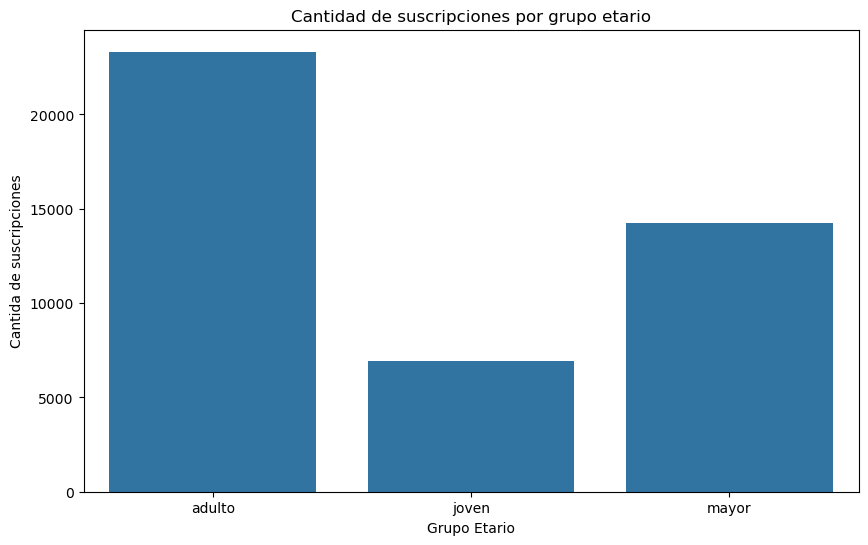

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(data=suscripcion_por_edad, x="grupo_etario", y="y")
plt.title("Cantidad de suscripciones por grupo etario")
plt.xlabel("Grupo Etario")
plt.ylabel("Cantida de suscripciones")
plt.show()

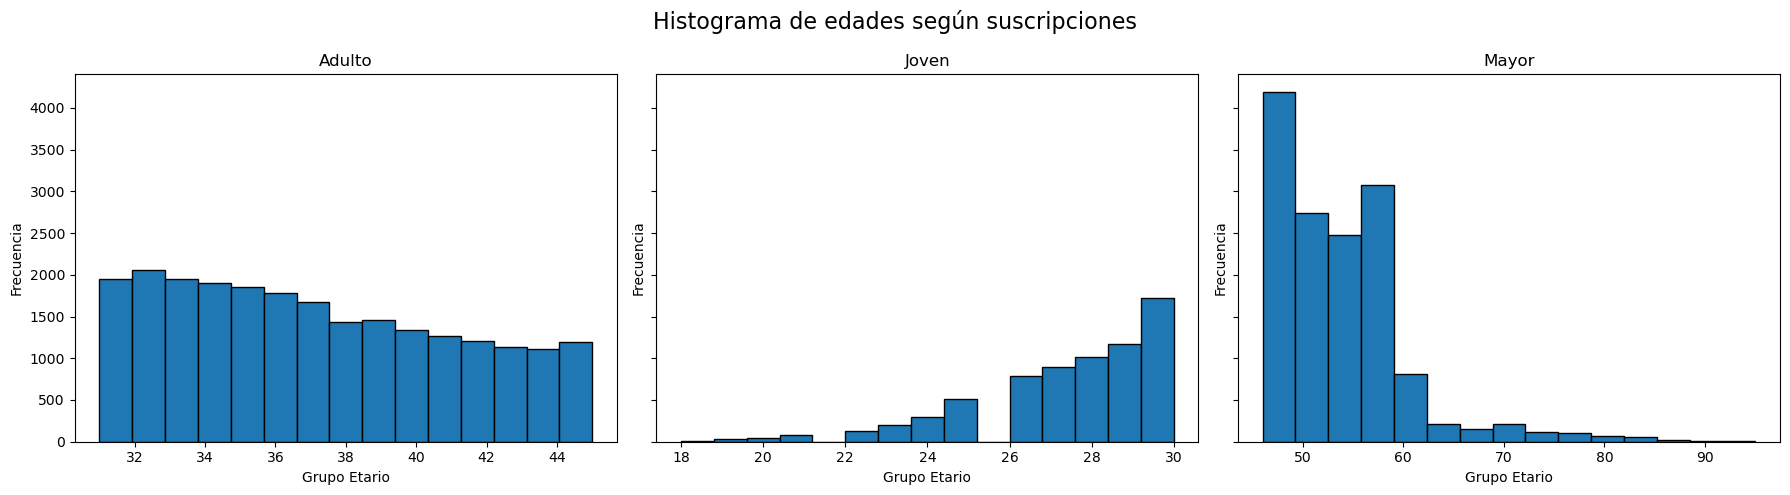

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
grupos = ["adulto", "joven", "mayor"]

for ax, grupo in zip(axes, grupos):
    subset = df_bank[df_bank["grupo_etario"] == grupo]
    ax.hist(subset["age"], bins=15, edgecolor='black')
    ax.set_title(f"{grupo.capitalize()}")
    ax.set_xlabel("Grupo Etario")
    ax.set_ylabel("Frecuencia")

fig.suptitle("Histograma de edades según suscripciones", fontsize=16)
plt.tight_layout()
plt.show()


### → Mapeo de variable target

In [21]:
df_bank['y'] = df_bank['y'].map({'yes': 1, 'no': 0})

In [22]:
df_bank["y"].value_counts()

y
0    39236
1     5268
Name: count, dtype: int64

In [23]:
si_suscrito = df_bank[df_bank['y'] == 1]
no_suscripto = df_bank[df_bank['y'] == 0]

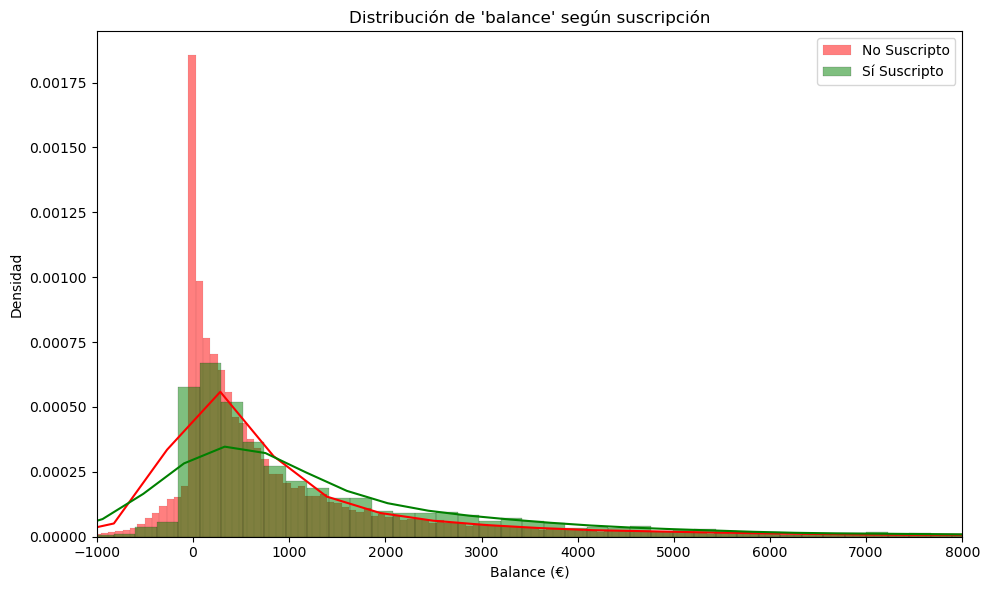

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(no_suscripto["balance"], label="No Suscripto", color="red", kde=True, stat="density")
sns.histplot(si_suscrito["balance"], label="Sí Suscripto", color="green", kde=True, stat="density")

plt.title("Distribución de 'balance' según suscripción")
plt.xlabel("Balance (€)")
plt.ylabel("Densidad")
plt.legend()
plt.xlim(-1000, 8000) 
plt.tight_layout()
plt.show()


## 💶 Distribución del Balance según Suscripción

La gráfica muestra la distribución del **balance promedio anual en euros**, diferenciando entre clientes que **no se suscribieron** (rojo) y aquellos que **sí se suscribieron** (verde) a un depósito a plazo. A partir de la visualización, se pueden destacar las siguientes conclusiones:

### 🔍 Conclusiones:

- Los **clientes que se suscribieron** tienden a tener balances **ligeramente más altos**, con una densidad más pronunciada a partir de los **1.000€**, lo cual puede indicar una mayor capacidad económica o mayor estabilidad financiera.

- Los **clientes no suscriptos** presentan un pico abrupto en torno a los **0€** o incluso valores negativos, lo que sugiere que muchos de ellos podrían estar sobregirados o tener saldos muy bajos.

- A partir de los **2.000€**, la proporción de clientes suscriptos comienza a superar a la de los no suscriptos, manteniéndose constante a lo largo de la "cola larga" de la distribución.

- La **asimetría positiva** es evidente en ambos grupos, con unos pocos clientes que presentan balances excepcionalmente altos (hasta más de 70.000€), aunque estos son casos muy poco frecuentes.


### `Distribución general de la variable target`

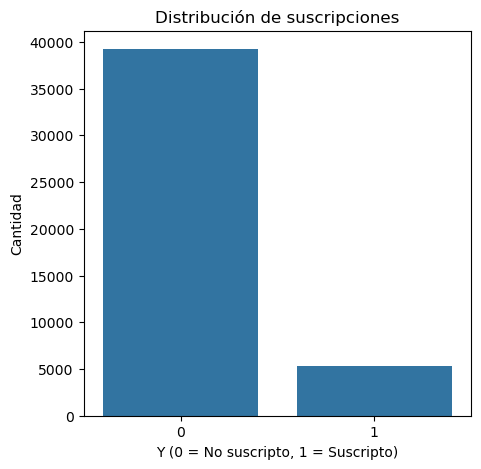

In [25]:
plt.figure(figsize=(5, 5))
sns.countplot(data=df_bank, x='y')
plt.title("Distribución de suscripciones")
plt.xlabel("Y (0 = No suscripto, 1 = Suscripto)")
plt.ylabel("Cantidad")
plt.show()


### `Análisis por variables categóricas (satisfacción, desempeño, balance)`

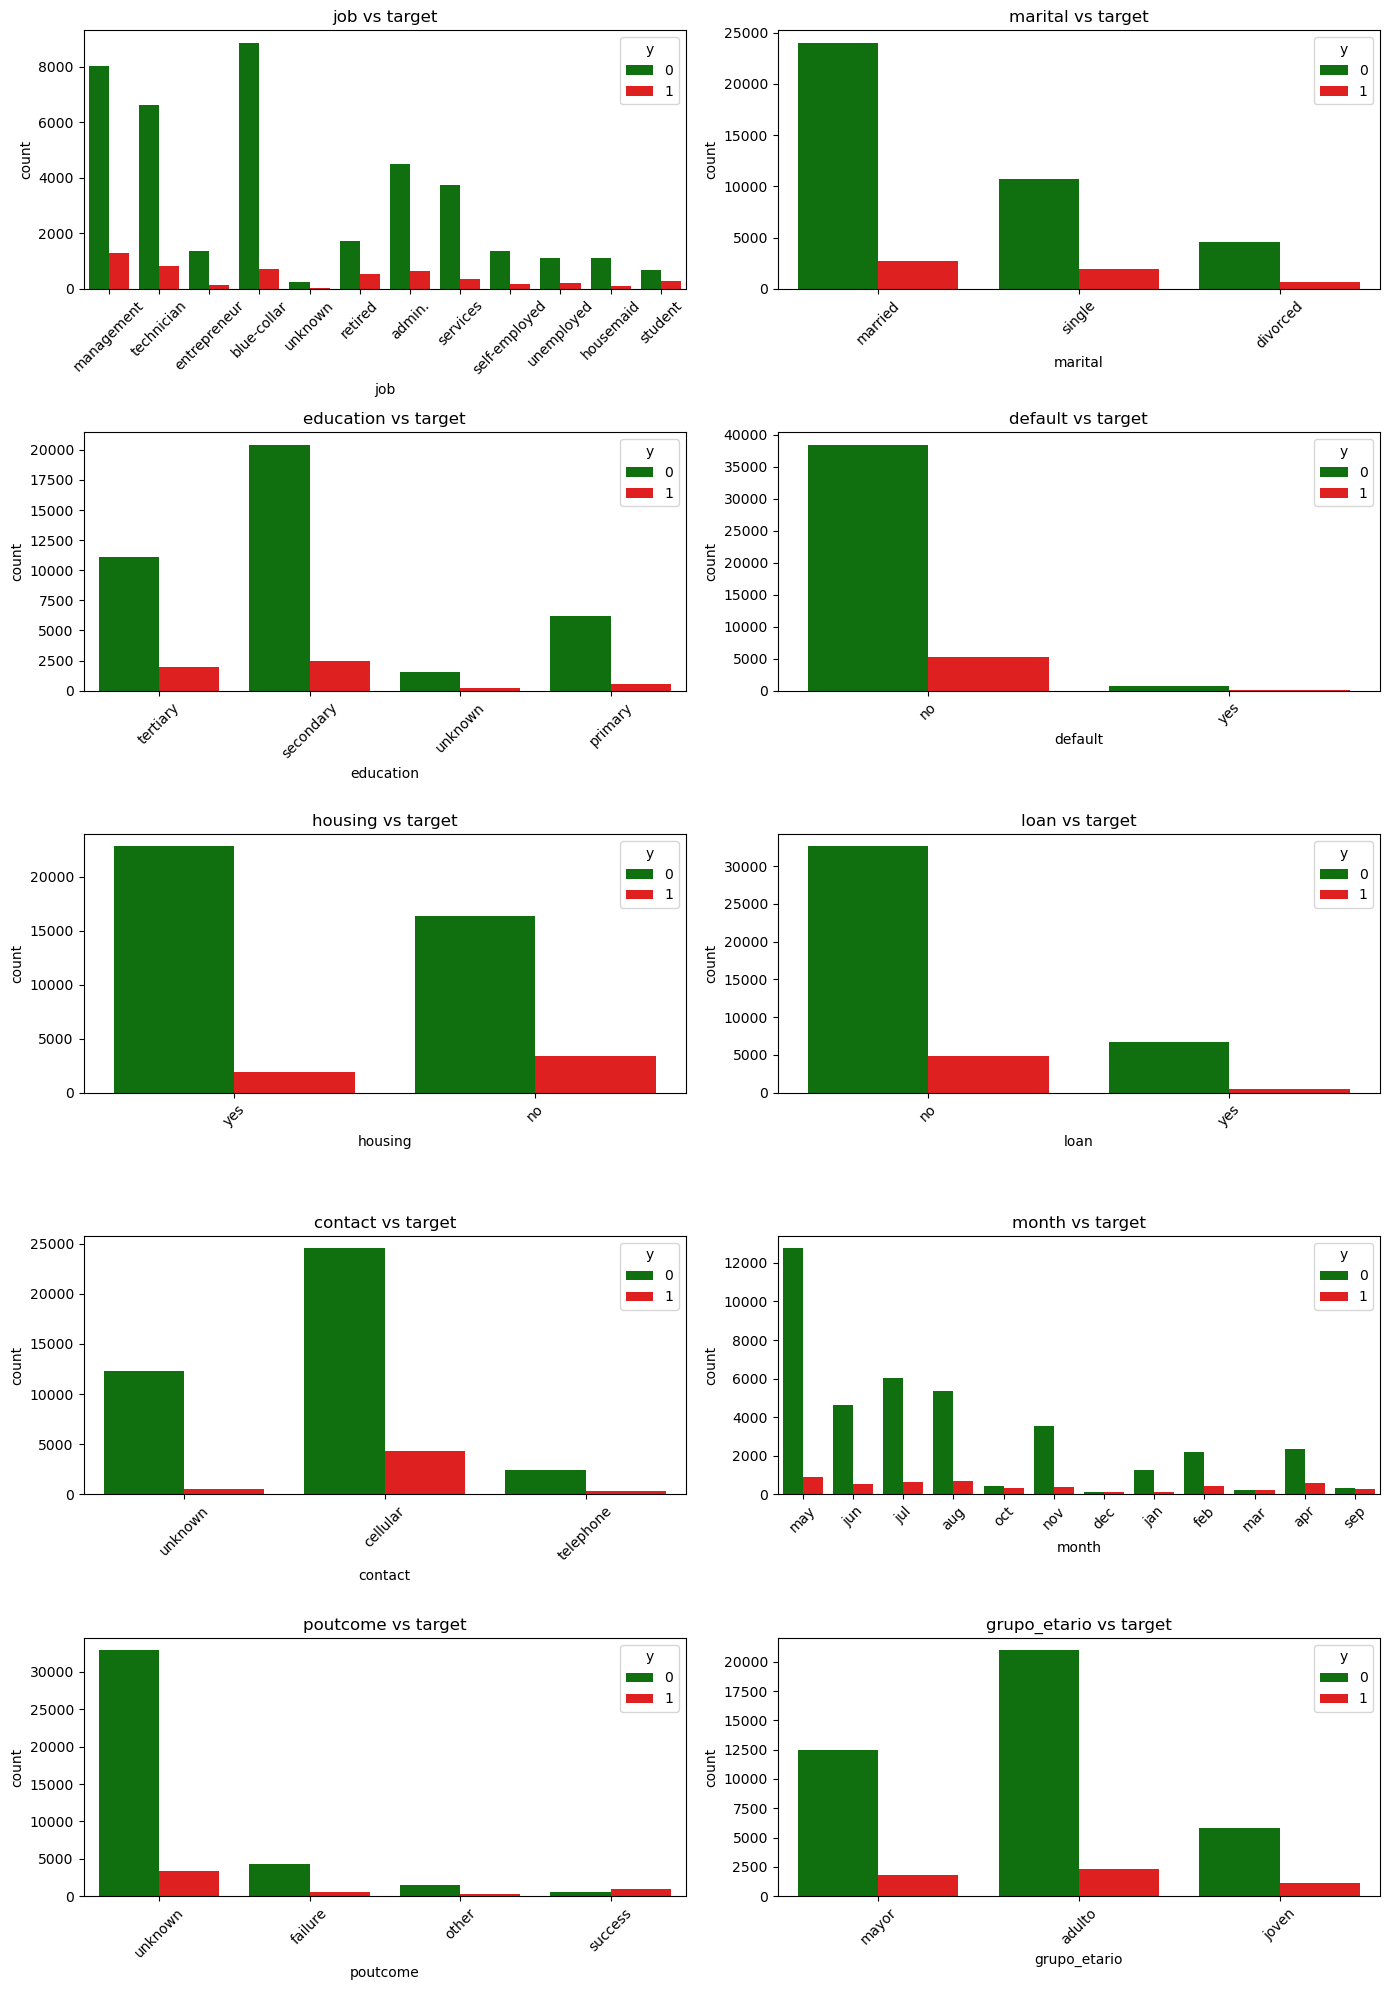

In [26]:
import math

categoricas = df_bank.select_dtypes(exclude=[np.number]).columns.tolist()

categoricas = categoricas

fig, axs = plt.subplots(math.ceil(len(categoricas)/2), 2, figsize=(14, 4 * math.ceil(len(categoricas)/2)))
axs = axs.flatten()

custom_palette = {1: 'Red', 0: 'Green'}

for i, col in enumerate(categoricas):
    sns.countplot(data=df_bank, x=col, hue='y', palette=custom_palette, ax=axs[i])
    axs[i].set_title(f'{col} vs target')
    axs[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## 📌 Conclusión

Con base en el análisis realizado, los **clientes que sí se suscribieron** tienden a compartir ciertas características que los distinguen de quienes **no lo hicieron**. A continuación, se resumen las principales tendencias observadas:

| **Columna (Característica)** | **Tendencia en clientes suscriptos**                      |
|------------------------------|------------------------------------------------------------|
| 💼 `job`                     | Mayor proporción en **estudiantes, jubilados y administrativos** |
| 💍 `marital`                 | Más frecuente entre clientes **solteros**                  |
| 🎓 `education`              | Aumenta con nivel educativo: predominan **terciario y secundario** |
| ❌ `default`                | Muy pocos clientes con crédito en **default**              |
| 🏡 `housing`                | Más frecuentes entre quienes **no tienen préstamo hipotecario** |
| 💳 `loan`                   | Rara vez tienen **préstamos personales**                   |
| ☎️ `contact`                | Altamente asociados a contacto por **celular**             |
| 🗓️ `month`                 | Mayor tasa de éxito en los meses de **mayo, junio, julio y agosto** |
| 📊 `poutcome`              | Aquellos con **éxito en campañas anteriores** tienen mayor probabilidad |
| 👤 `grupo_etario`          | Predominan los clientes **adultos jóvenes o solteros**     |

Estas observaciones sugieren que la probabilidad de contratar un depósito a plazo está fuertemente influenciada por factores demográficos (edad, estado civil), educativos, historial crediticio, y la forma y momento en que se realiza el contacto. Esta información es clave para **segmentar campañas futuras** y maximizar la tasa de conversión.


---

## **Parte 3: Preparación de Datos para Modelado**


### → Selección de Características. Decido qué variables incluir en el modelo. Considero excluir variables con sesgos introducidos artificialmente para evaluar su impacto en el rendimiento del modelo.

In [27]:
df_bank.select_dtypes(include=['object']).columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'grupo_etario'],
      dtype='object')

In [28]:
binarias = ['default', 'housing', 'loan']
for col in binarias:
    df_bank[col] = df_bank[col].map({'yes': 1, 'no': 0})    

In [29]:
df_bank = df_bank.drop(['grupo_etario'], axis=1)

In [30]:
categoricas = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
df_bank = pd.get_dummies(df_bank, columns=categoricas)

In [31]:
df_bank = df_bank.replace({True: 1, False: 0})

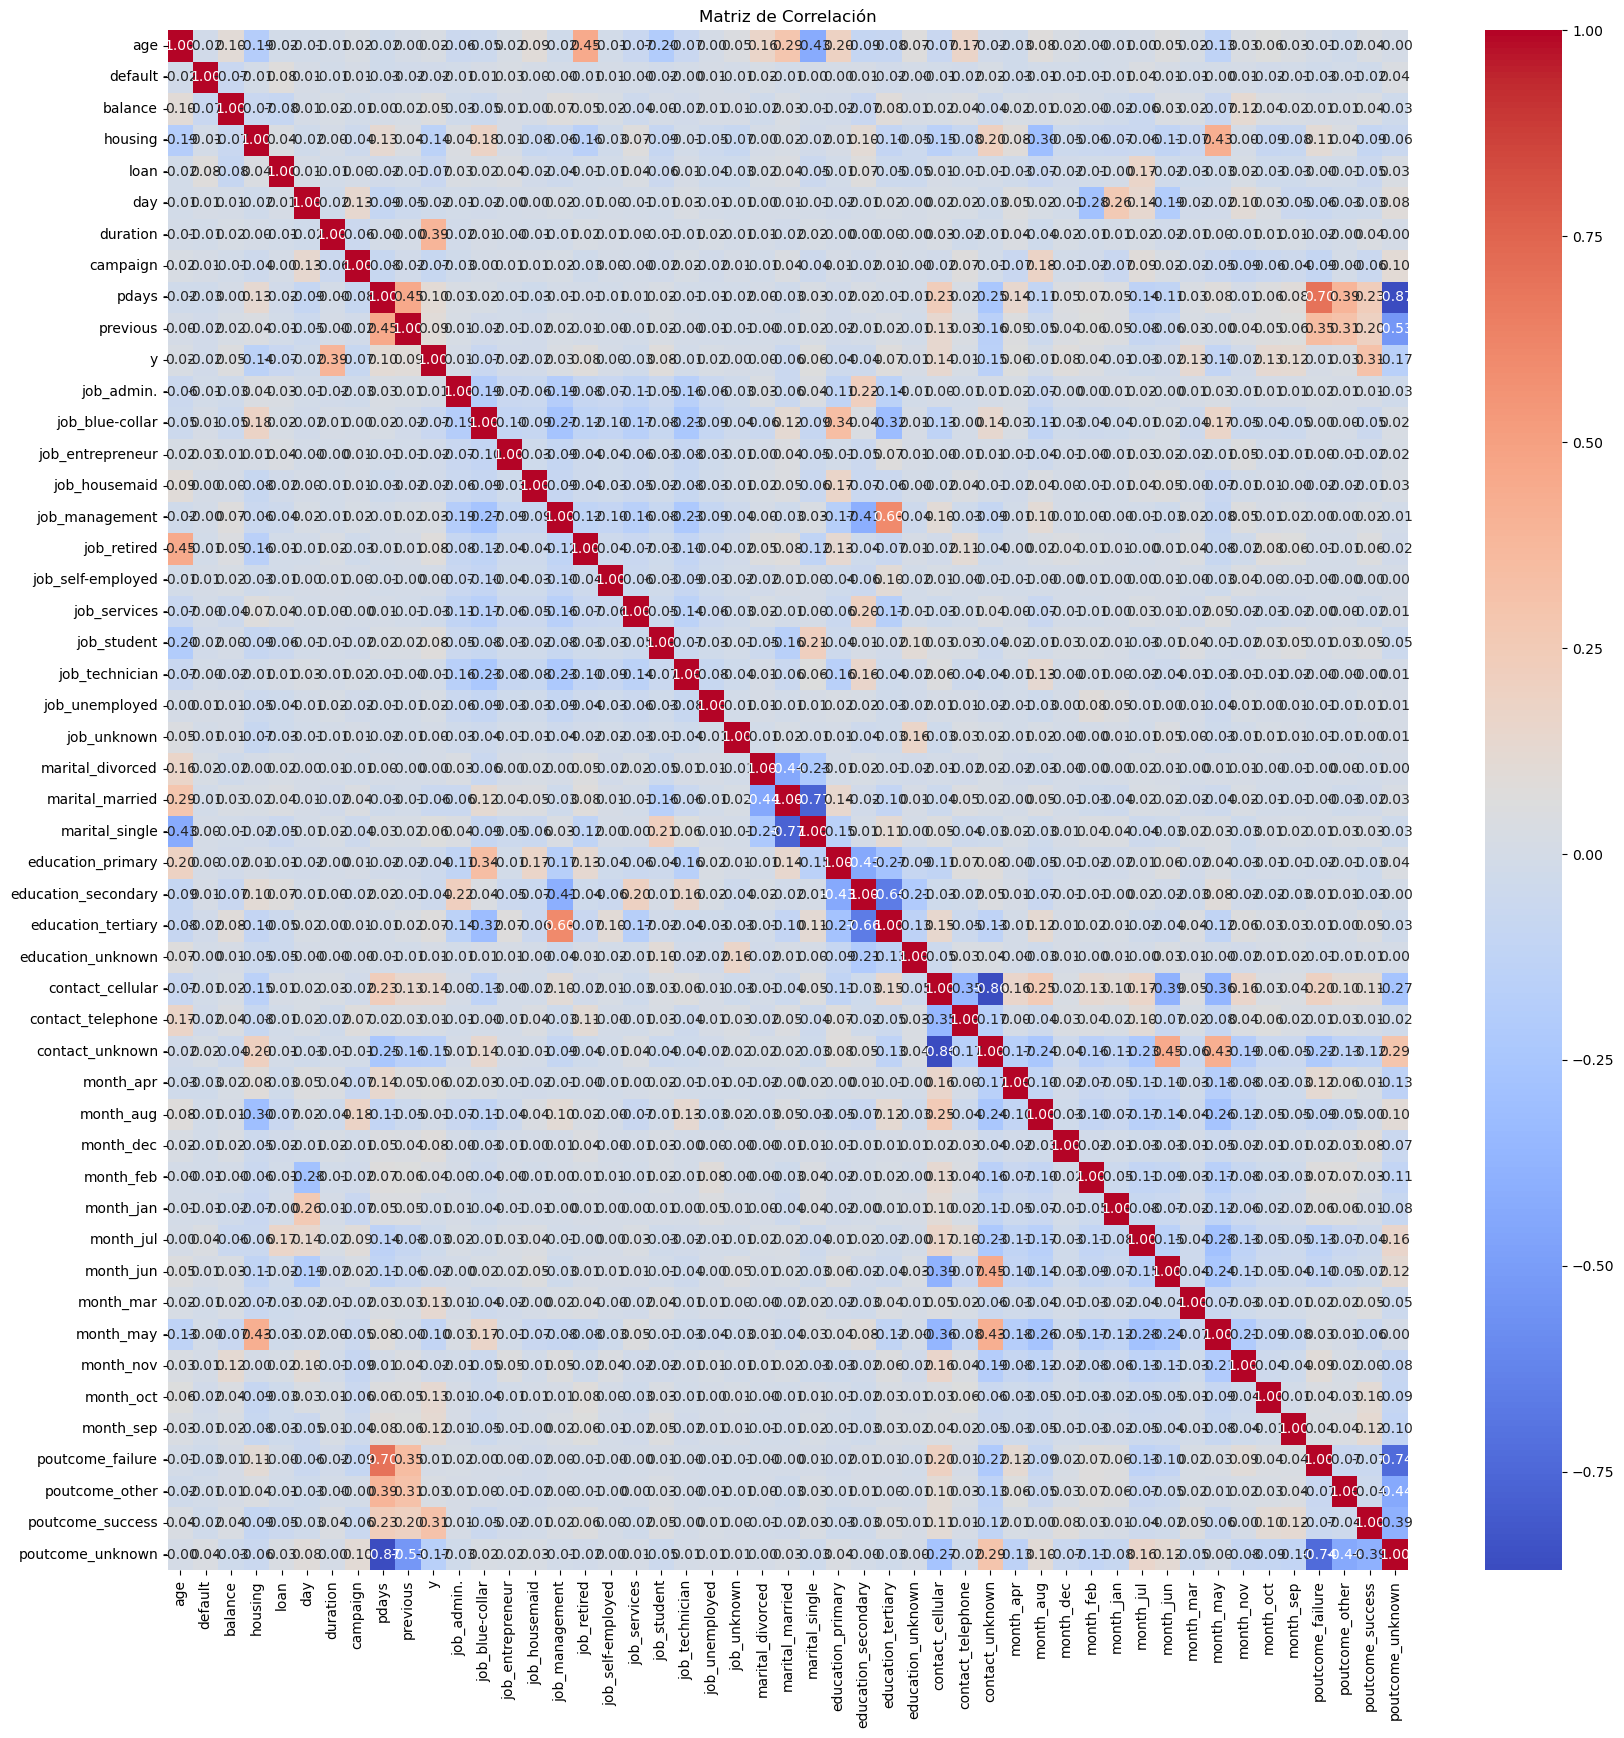

In [32]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_bank.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlación")
plt.show()

In [33]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44504 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  44504 non-null  int64  
 1   default              44504 non-null  int64  
 2   balance              44504 non-null  int64  
 3   housing              44504 non-null  int64  
 4   loan                 44504 non-null  int64  
 5   day                  44504 non-null  int64  
 6   duration             44504 non-null  float64
 7   campaign             44504 non-null  int64  
 8   pdays                44504 non-null  int64  
 9   previous             44504 non-null  int64  
 10  y                    44504 non-null  int64  
 11  job_admin.           44504 non-null  int64  
 12  job_blue-collar      44504 non-null  int64  
 13  job_entrepreneur     44504 non-null  int64  
 14  job_housemaid        44504 non-null  int64  
 15  job_management       44504 non-null  int6

In [34]:
##from scipy import stats
## df_casas = df_casas[(np.abs(stats.zscore(df_casas["price"])) < 3)]

### Hago Log Transform de la variable balance.

In [35]:
#df_bank["log_balace"] = np.log1p(df_bank["balance"])
#df_bank

---

## **Parte 4: Modelado**


In [36]:
# Separo mi df en X e Y
X = df_bank.drop(['y'], axis=1)
y = df_bank['y']

# Separo en train y test con 0.2 en test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify = y
)

##### ¿Está balanceado mi dataset?

In [37]:
# Contar la cantidad de valores de cada clase
counts = y.value_counts()

# Calcular la proporción de cada clase
prop = counts / counts.sum()

# Imprimir los resultados
print("Número de muestras por clase:\n", counts)
print("\nProporción de muestras por clase:\n", prop)


Número de muestras por clase:
 y
0    39236
1     5268
Name: count, dtype: int64

Proporción de muestras por clase:
 y
0    0.881629
1    0.118371
Name: count, dtype: float64


##### Sí. Claramente este dataset esta desbalanceado, por lo tanto vamos a necesitar usar un metodo de balanceo de clases.

In [38]:
from sklearn.exceptions import FitFailedWarning
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FitFailedWarning)

In [39]:
# Funciones que utilizaré al trabajar con mi modelo
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import scipy.stats as st

from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm
from lightgbm import LGBMClassifier

from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold, train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import roc_auc_score, f1_score, roc_curve, auc, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.pipeline import Pipeline, make_pipeline

In [40]:
def model_trial(model, parameters):
    np.random.seed(42)

    # Definimos los 5 splits (cv) para mantener la proporción de clases
    kf = StratifiedKFold(n_splits=5, shuffle=False)

    # Definimos el pipeline
    pipe = Pipeline(steps=[
        ('sampler', 'passthrough'),  # Balanceo de clases
        #('imputer', SimpleImputer(strategy='median')),  # Imputación de valores faltantes
        ('scaler', StandardScaler()),  # Escalado de variables numericas
        ('selector', SelectKBest(f_classif)),  # Selección de k características mejores
        ('classifier', model)  # Modelo
    ])


    # Hiperparámetros + opciones de balanceo
    full_param_grid = {
        'sampler': ['passthrough', SMOTE(), RandomOverSampler(), SMOTEENN(), SMOTETomek()], # estrategias de balanceo de clases
        'selector__k': [10, 15, 20, 25, 30, 35],
        **parameters # parametros propios de clasificador
    }

    # RandomizedSearchCV con scoring basado en precision (quiero optimizar esa métrica) ya que el error por exceso es grave.
    grid = RandomizedSearchCV(pipe, full_param_grid, cv=kf, scoring='precision')
    grid.fit(X_train, y_train)

    # Obtenemos el mejor modelo
    best_params = grid.best_params_ # mejor combinación de hiperparámetros encontrada
    best_model = grid.best_estimator_ # pipeline completo (incluyendo modelo y preprocesamiento) con mejor rendimiento
    best_score = grid.best_score_ # mejor valor de la métrica usada en CV (en este caso, precision)

    # Métricas de entrenamiento
    y_train_pred = best_model.predict(X_train)
    auc_roc_train = roc_auc_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred)

    # Métricas de test
    y_pred = best_model.predict(X_test)
    auc_roc = roc_auc_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    # Prints
    print(f"Mejores parámetros: {best_params}")
    print(f"AUC-ROC Train: {auc_roc_train} and AUC-ROC Test: {auc_roc}")
    print(f"F1-Score Train: {f1_train} and F1-Score Test: {f1}")
    print(f"Precision Train: {precision_train} and Precision Test: {precision}")
    print(f"Recall-Score Train: {recall_train} and Recall-Score Test: {recall}")
    ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)

    return recall, auc_roc, f1, precision, best_model, recall_train, auc_roc_train, f1_train, precision_train, best_params


---

## **Logistic Regresion**

In [41]:
model_lr = LogisticRegression(penalty='l2', random_state=99)

parameters_lr = {
    'classifier__C': [0.001, 0.01, 0.1, 1],  # inverso de la regularización L2 (menor C = más regularización)
    'classifier__class_weight': [None, 'balanced']  # ajusta el peso de las clases para tratar desbalance
}

lr = model_trial(model_lr, parameters_lr)


KeyboardInterrupt: 

---

## **Random Forest**

Mejores parámetros: {'selector__k': 25, 'sampler': RandomOverSampler(), 'classifier__n_estimators': 150, 'classifier__max_leaf_nodes': 16, 'classifier__max_depth': 8, 'classifier__class_weight': 'balanced'}
AUC-ROC Train: 0.8316760896606408 and AUC-ROC Test: 0.8292222532015885
F1-Score Train: 0.506906741804687 and F1-Score Test: 0.5082195597659516
Precision Train: 0.35677662764825385 and Precision Test: 0.35976331360946745
Recall-Score Train: 0.8751779781680114 and Recall-Score Test: 0.8652751423149905


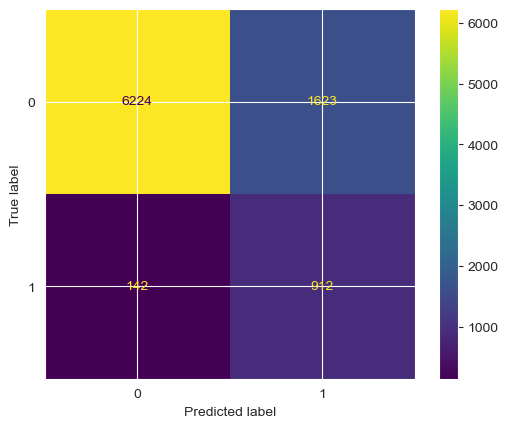

In [ ]:
model_rf = RandomForestClassifier(random_state=99)

parameters_rf = {
    'classifier__n_estimators': [100, 150, 200, 250, 300],  # cantidad de árboles
    'classifier__max_depth': [3, 4, 5, 6, 7, 8],  # profundidad máxima de cada árbol (más profundo = más complejo)
    'classifier__max_leaf_nodes': [4, 6, 8, 10, 12, 14, 16, 18, 20],  # máximo número de nodos internos (controla el tamaño del árbol)
    'classifier__class_weight': [None, 'balanced']  # ajusta el peso de las clases para manejar desbalance
}

rf = model_trial(model_rf, parameters_rf)


---

## **XGBoost**


Mejores parámetros: {'selector__k': 30, 'sampler': RandomOverSampler(), 'classifier__subsample': 0.7, 'classifier__scale_pos_weight': 2, 'classifier__reg_lambda': 1, 'classifier__reg_alpha': 0.1, 'classifier__n_estimators': 150, 'classifier__min_child_weight': 5, 'classifier__max_depth': 5, 'classifier__learning_rate': 0.01, 'classifier__colsample_bytree': 0.8}
AUC-ROC Train: 0.8006493127113551 and AUC-ROC Test: 0.7997872741223334
F1-Score Train: 0.4145529080194722 and F1-Score Test: 0.4165454167532737
Precision Train: 0.2643618064178812 and Precision Test: 0.2667021559755124
Recall-Score Train: 0.9598955861414333 and Recall-Score Test: 0.9506641366223909


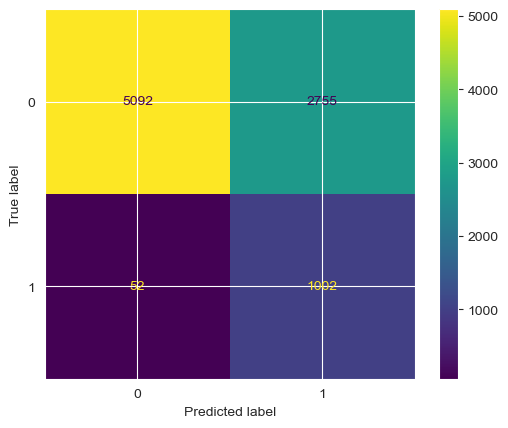

In [ ]:
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

parameters_xgb = {
    'classifier__n_estimators': [100, 150, 200, 250, 300],  # divisiones del modelo XGB
    'classifier__learning_rate': [0.01, 0.05, 0.1],  # mínimo information gain por división
    'classifier__max_depth': [3, 4, 5, 6, 7],  # reducir la profundidad
    'classifier__min_child_weight': [4, 5, 6, 7],  # mayor peso = menos división
    'classifier__subsample': [0.6, 0.7, 0.8],  # igual, introduce aleatoriedad
    'classifier__colsample_bytree': [0.6, 0.7, 0.8],  # también baja un poco la complejidad
    'classifier__reg_alpha': [0.1, 0.5, 1],  # regularización L1
    'classifier__reg_lambda': [1, 2, 3],  # regularización L2
    'classifier__scale_pos_weight': [1, 1.5, 2]  # balanceo de clases para regresión logística
}

xgb = model_trial(model_xgb, parameters_xgb)

---

In [ ]:
def crear_tabla_resultados(lr, lgbm, xgb, scoring='precision'):

    df_funciones = pd.DataFrame()
    df_funciones["metodo"] = ["Regresión Logística", "LightGBM", "XGB"]

    df_funciones["best_model"] = [lr[4], lgbm[4], xgb[4]]
    df_funciones["best_params"] = [lr[9], lgbm[9], xgb[9]]

    df_funciones["recall_train"] = [lr[5], lgbm[5], xgb[5]]
    df_funciones["recall"] = [lr[0], lgbm[0], xgb[0]]

    df_funciones["precision_train"] = [lr[8], lgbm[8], xgb[8]]
    df_funciones["precision"] = [lr[3], lgbm[3], xgb[3]]

    df_funciones["f1_train"] = [lr[7], lgbm[7], xgb[7]]
    df_funciones["f1"] = [lr[2], lgbm[2], xgb[2]]

    df_funciones["auc_roc_train"] = [lr[6], lgbm[6], xgb[6]]
    df_funciones["auc_roc"] = [lr[1], lgbm[1], xgb[1]]

    df_funciones = df_funciones.sort_values(by=scoring, ascending=False)

    return df_funciones

In [ ]:
tabla = crear_tabla_resultados(lr, lgbm, xgb, scoring='precision')
display(tabla)

,metodo,best_model,best_params,recall_train,recall,precision_train,precision,f1_train,f1,auc_roc_train,auc_roc
2,XGB,"(RandomOverSampler(), StandardScaler(), Select...","{'selector__k': 30, 'sampler': RandomOverSampl...",0.959896,0.950664,0.264362,0.266702,0.414553,0.416545,0.800649,0.799787
1,Random Forest,"(RandomOverSampler(), StandardScaler(), Select...","{'selector__k': 25, 'sampler': RandomOverSampl...",0.875178,0.865275,0.356777,0.359763,0.506907,0.508220,0.831676,0.829222
0,Regresión Logística,"(RandomOverSampler(), StandardScaler(), Select...","{'selector__k': 20, 'sampler': RandomOverSampl...",0.803275,0.799810,0.413814,0.416502,0.546232,0.547758,0.825257,0.824653


In [ ]:
def plot_roc_curves(lr, lgbm, xgb, X_test, y_test):

    modelos = {
        "Logistic Regression": lr[4],
        "LightGBM": lgbm[4],
        "XGBoost": xgb[4],
    }

    plt.figure(figsize=(9, 6))

    for nombre, modelo in modelos.items():
        # Probabilidades de clase positiva
        y_proba = modelo.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, label=f"{nombre} (AUC = {roc_auc:.2f})")

    # Línea de referencia (modelo aleatorio)
    plt.plot([0, 1], [0, 1], 'k--', lw=1)

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curvas ROC comparativas')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

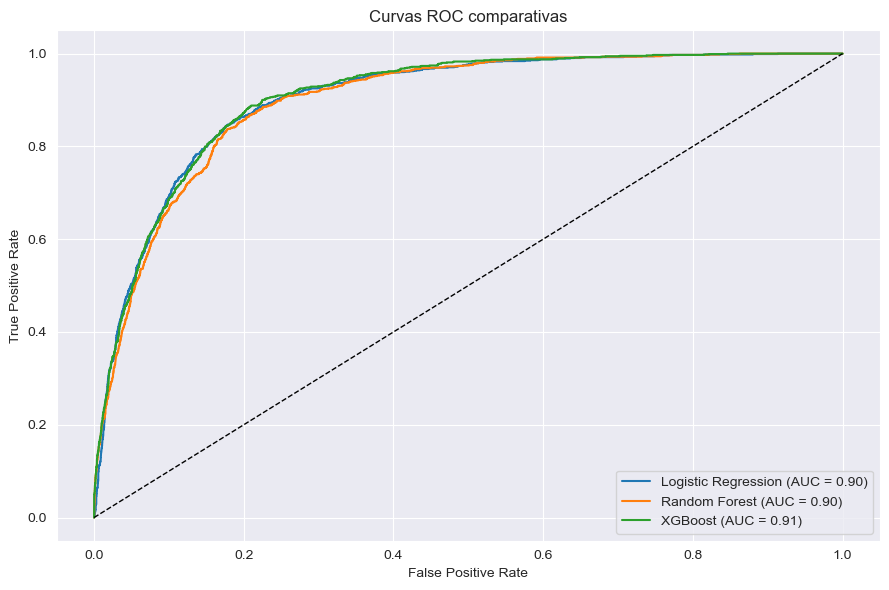

In [ ]:
plot_roc_curves(lr, lgbm, xgb, X_test, y_test)

### 📊 Conclusiones del Desempeño de Modelos de Clasificación

Luego de entrenar y evaluar distintos modelos para predecir la suscripción a un depósito a plazo, se obtuvieron los siguientes resultados en el conjunto de test:

| Modelo                | Recall | Precision | F1-score | AUC-ROC |
|-----------------------|--------|-----------|----------|---------|
| **XGBoost**           | 0.9507 | 0.2667    | 0.4165   | 0.7998  |
| **Random Forest**     | 0.8653 | 0.3598    | 0.5082   | 0.8292  |
| **Regresión Logística** | 0.7998 | 0.4165    | 0.5478   | 0.8247  |

---

### ✅ Observaciones clave

- **XGBoost** es el modelo con **mejor recall (0.95)**, lo que indica que identifica correctamente la mayoría de los casos positivos (clientes que sí se suscriben). Es ideal si se prioriza no perder oportunidades de conversión, aunque su precisión es baja.

- **Random Forest** logra el mejor **equilibrio entre recall y precision**, con un **F1-score superior a XGBoost**, lo que lo convierte en una opción sólida cuando se busca balancear ambas métricas.

- **Regresión Logística** tiene la **mejor precisión (0.4165)**, lo que significa que de los casos que predice como positivos, la proporción correcta es mayor. Sin embargo, su recall es más bajo que los otros modelos.

- En términos de **AUC-ROC**, los tres modelos presentan valores altos (entre 0.80 y 0.83), indicando buena capacidad discriminativa general. **Random Forest y Logística** lideran este aspecto.

---

### 🧠 Conclusión final

- Si el objetivo es **no dejar pasar ningún cliente potencial** que pueda contratar el servicio (minimizar falsos negativos), **XGBoost** es la mejor opción por su altísimo **recall**.

- Si el foco está en **el balance entre efectividad y eficiencia** (minimizar tanto falsos positivos como falsos negativos), **Random Forest** es el modelo más equilibrado.

- En escenarios donde los recursos son limitados y es más importante **acertar a quién se contacta**, la **regresión logística** puede ser útil por su **mayor precisión** y simplicidad interpretativa.

> La elección final del modelo depende del **costo de los falsos negativos** vs. **falsos positivos** en el contexto de negocio.


---

# 📘 Preguntas Teóricas Relacionadas – Inteligencia Artificial (2do Semestre 2023)

## a) ¿Por qué es importante dividir el conjunto de datos en entrenamiento y prueba en este ejercicio?

Es importante dividir el conjunto de datos en Train (70% u 80%) y Test (30% o 20%) para:
- Saber si realmente mi modelo esta memorizando los datos o si esta aprendiendo de los patrones.
- Prevenir el overfitting, que es cuando hago un modelo tan específico que después cuando cambio los datos comienzan a haber outsiders.

---

## b) Describe el concepto de "bagging" en Random Forest y cómo contribuye a la mejora del rendimiento del modelo.

Bagging es una técnica de ensamble, que significa combinar multiples modelos para mejorar el rendimiento. Nosotros podemos tener muchos modelos que tienen un bajo rendimiento, pero si los combinamos podemos tener un modelo mucho mas potente. 

Bagging se encarga de realizar un entrenamiento paralelo e independiente en donde la CPU y el uso de memoria son altos. Esta técnica de ensable se encarga de reducir la varianza para poder hacer al modelo mas robusto y con menos sobreajuste.

---

## c) En el contexto de la regresión logística, explique el concepto de regularización. ¿Por qué es importante aplicarla?

La regularización consiste en agregar un término a la función de coste para penalizar aquellos parámetros que son altos.

Hay 3 tipos de regularización:

- Lasso (q=1) → se utiliza cuando tengo muchas variables inútiles y su objetivo es eliminar aquellas que tienen poca significancia poniéndoles un coeficiente de cero

- Ridge (q=2) → se utiliza cuando tengo muchas variables que son útiles y su objetivo es sacarle complejidad al modelo haciendo tender los coeficientes de las variables a cero.

- Elastic Net → combina ambas técnicas de regularización. Tiene como ventajas que elimina variables según regularización de Lasso, permite el balanceo de clases (N y P), así como también previene el overfitting. Tiene como desventajas que al reducir la varianza, aumenta el sesgo y que si o si se requiere de estandarización de datos numéricos.

Ambas ayudan a **mejorar la generalización** del modelo en datos no vistos.

---

## d) ¿Cuáles son algunos de los hiperparámetros clave en un modelo de Random Forest y cómo pueden afectar el rendimiento del modelo?

| Hiperparámetro            | Efecto principal                                                |
|---------------------------|------------------------------------------------------------------|
| `n_estimators`            | Más árboles → mayor estabilidad pero mayor costo computacional. |
| `max_depth`               | Controla la profundidad de cada árbol → afecta overfitting.      |
| `min_samples_split`       | Mínimo de muestras para dividir → regula crecimiento del árbol.  |
| `max_features`            | Cuántas features usar por árbol → balancea diversidad y precisión. |

---

## e) ¿Por qué podría ser beneficioso ajustar los hiperparámetros de un modelo de Random Forest, incluso en un conjunto de datos relativamente simple como este?

(la respuesta sería contrarrestar todas las cosas negativas que tiene un decision tree)

Ajustar hiperparámetros:
- Permite **mejorar la precisión** del modelo adaptándolo a la estructura específica del dataset.
- Evita **overfitting o underfitting** al encontrar la configuración óptima de profundidad, árboles y criterios de división.
- Incluso en datasets simples, puede **mejorar la eficiencia** computacional usando menos árboles o menor profundidad sin perder rendimiento.


---

# Resolución de Problema con Algoritmos Genéticos: Juegos Olímpicos

## a. Enunciado del problema

Se desea formar equipos de atletas para los Juegos Olímpicos, asignando a cada atleta a una disciplina deportiva en función de sus habilidades físicas (como velocidad, fuerza, resistencia, precisión y flexibilidad) y sus preferencias personales.

Cada disciplina requiere cierto perfil físico, tiene un cupo limitado de participantes, y los atletas solo pueden participar en una única disciplina.

**Objetivo:** Asignar atletas a disciplinas de manera que se maximice el rendimiento global del equipo, considerando la afinidad entre habilidades del atleta y los requisitos del deporte, así como sus preferencias.

---

## b. ¿Por qué resulta conveniente resolverlo con Algoritmos Genéticos?

Los AG son una herramienta muy poderosa de la IA, basados en el principio de la selección natural de Darwin. Los mismos permiten encontrar soluciones óptimas a problemas muy difíciles que nosotros por fuerza bruta no podríamos resolver.

Usar fuerza bruta implica encontrar soluciones:

- **Ineficientes en términos de tiempo y recursos**
- **Poco óptimas, ya que la fuerza bruta siempre tiende a usar una solución subóptima**
- **Con limitaciones de complejidad, debido a que la fuerza bruta es poco práctica y no se puede llevar a grandes escalas.**

``Dentro de las ventajas de los AG, tenemos las siguientes:``
	
- **Capacidad de optimización:** son capaces de encontrar soluciones óptimas a problemas muy complejos con espacios de búsqueda muy grandes y difíciles de explorar.
- **Aplicabilidad y flexibilidad:** se pueden aplicar a un montón de ejemplos y casos haciendo que sean ampliamente versátiles.
- **Paralelismo inherente:** gracias a la generación de una población, podemos llegar a un mismo objetivo por distintos caminos o soluciones.
- **Robustez y tolerancia a ruido:** soportan datos que son imprecisos e imperfectos.
- **Inexistencia de Restricciones:** como los problemas no tienen reglas, ni especificaciones, la aplicabilidad de los AG es muy extensa.

---

## c. Dos elementos a modificar para adaptar el algoritmo genético

### 🔧 1. Representación del individuo (genoma)

Cada individuo debe representar una asignación de atleta → disciplina.

**Programación:**
Se crea una función que genera un diccionario donde las claves son atletas y los valores son disciplinas asignadas.

```python
def create_individual(atletas, disciplinas):
    """
    Asigna a cada atleta una disciplina al azar, sin tener en cuenta todavía restricciones ni habilidades.
    """
    individuo = {}
    for atleta in atletas:
        individuo[atleta] = random.choice(disciplinas)
    return individuo
```


### 🔧 2. Función de aptitud (fitness function)

Debe evaluar cuán buena es la asignación:
- Bonus si el atleta está en su disciplina preferida.
- Bonus si sus habilidades se ajustan bien a lo requerido.
- Penalización si supera cupo o si el atleta es asignado a una disciplina inadecuada.

**Programación:**
Se crea una función que recorre el individuo y suma puntos por coincidencias y penaliza por incoherencias o incompatibilidades.

```python
def calcular_fitness(individuo, habilidades_atletas, requerimientos_disciplina, preferencias, cupos):
    """
    Calcula la utilidad de una asignación atleta → disciplina.
    Premia por coincidencias de habilidades y preferencias, penaliza por incompatibilidades y sobrecupo.
    """
    fitness = 0
    conteo_disciplina = {d: 0 for d in requerimientos_disciplina.keys()}

    for atleta, disciplina in individuo.items():
        conteo_disciplina[disciplina] += 1

        # Preferencia satisfecha
        if disciplina in preferencias[atleta]:
            fitness += 5

        # Coincidencias de habilidades
        habilidades = habilidades_atletas[atleta]
        requeridas = requerimientos_disciplina[disciplina]
        coincidencias = sum(
            1 for h in requeridas if habilidades[h] >= requeridas[h]
        )
        fitness += coincidencias  # bonus por match

    # Penalización por exceso de cupo
    for d, count in conteo_disciplina.items():
        if count > cupos[d]:
            fitness -= 10 * (count - cupos[d])  # penalización por sobrecupo

    return fitness
```


---

## d. Genotipo y Fenotipo

- **Genotipo:** Representación interna del individuo. En este caso, un diccionario que indica qué atleta participa en qué disciplina.

- **Fenotipo:** Expresión externa y evaluable de esa solución. Es decir, el rendimiento total del equipo olímpico basado en la asignación propuesta.

---

## e. Técnica para seleccionar a los padres

**Selección por torneo (Tournament Selection)**

Se eligen al azar `k` individuos y se selecciona el mejor de ellos como padre.

### Ventajas:
- Rápido y simple.
- Control de presión selectiva ajustando el tamaño del torneo.
- No requiere normalizar los valores de fitness.

### Desventajas:
- Si `k` es muy grande, puede reducir la diversidad y provocar convergencia prematura.
- Si `k` es muy pequeño, puede introducir demasiado azar.

---

## f. ¿Se puede utilizar evolución continua?

**Sí, podría utilizarse evolución continua** si se espera que el problema cambie con el tiempo. Por ejemplo:

- Cambios en el estado físico de los atletas.
- Inclusión de nuevas disciplinas o eliminación de otras.
- Variación en las preferencias de los atletas.

La evolución continua permite adaptar la población de soluciones de forma dinámica sin reiniciar el proceso desde cero, lo cual es útil en contextos cambiantes como entrenamientos prolongados o juegos clasificatorios.

**En un escenario estático (una única competencia con datos fijos)**, no sería necesario implementar evolución continua.
